In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [2]:
heating = pd.read_csv("heating_1.csv")
heating.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [3]:
Y = heating['Y1']
X = heating.drop(['Y1'], axis =1 )

In [4]:
from sklearn.model_selection import train_test_split
Y = heating['Y1']
X = heating.drop('Y1',axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [5]:
from sklearn.svm import SVR

In [68]:
svr_rbf = SVR(kernel = 'rbf', C = 100, gamma = 0.195)
rbf_model = svr_rbf.fit(X_train,Y_train)

In [69]:
pred_test = rbf_model.predict(X_test)
mse = np.mean((Y_test - pred_test)**2) 
print("RMSE on the test data")
print(np.sqrt(mse))

RMSE on the test data
0.749287896603


In [70]:
pred_train = rbf_model.predict(X_train)
mse = np.mean((Y_train - pred_train)**2) 
print("RMSE on the train data")
print(np.sqrt(mse))

RMSE on the train data
0.282284422688


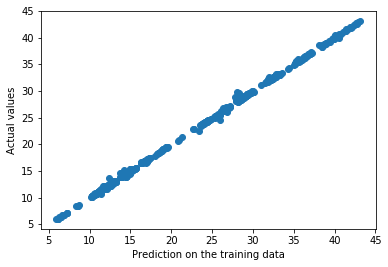

In [30]:
plt.scatter(pred_train, Y_train)
plt.xlabel('Prediction on the training data')
plt.ylabel('Actual values')
plt.show()

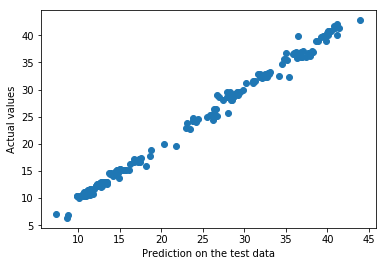

In [31]:
plt.scatter(pred_test, Y_test)
plt.xlabel('Prediction on the test data')
plt.ylabel('Actual values')
plt.show()

# Sensitivity analysis for the values of C and gamma

In [50]:
# Varying the value of gamma from 0.01 to 1

mse_test_array = []
gamma_plot = []
for i in range(0,100):
    svr_rbf = SVR(kernel = 'rbf', C = 100, gamma = 0.01 + 0.01 * i)
    rbf_model = svr_rbf.fit(X_train,Y_train)
    pred_test = rbf_model.predict(X_test)
    mse = np.mean((Y_test - pred_test)**2)
    mse_test_array.append(np.sqrt(mse))
    gamma_plot.append(0.01 + 0.01 * i)

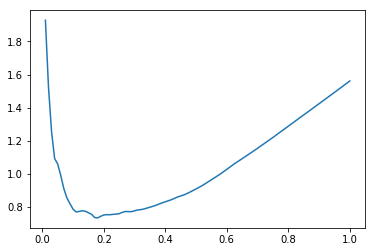

In [51]:
plt.plot(gamma_plot, mse_test_array)
plt.show()

In [71]:
# Varying the value of gamma from 1 to 10000

# mse_test_array = []
# C_plot = []
# for i in range(0,100):
#     svr_rbf = SVR(kernel = 'rbf', C = 1 + 100 * i, gamma = 0.01)
#     rbf_model = svr_rbf.fit(X_train,Y_train)
#     pred_test = rbf_model.predict(X_test)
#     mse = np.mean((Y_test - pred_test)**2)
#     mse_test_array.append(np.sqrt(mse))
#     C_plot.append(1 + 100 * i)

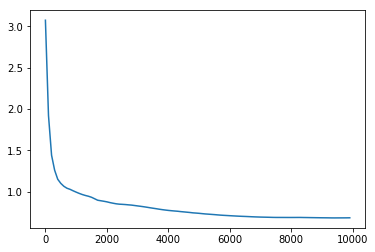

In [72]:
# plt.plot(C_plot, mse_test_array)
# plt.show()